234312028 Hilal Öztemel

#Kütüphanelerin import edilmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Drive a bağlama kodu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#veri setinin yolunu file_path adlı dosyaya yükle
file_path = "/content/drive/MyDrive/machinelearning/vize/veri-seti.txt"

# pandas kullanarak veri setini oku
df = pd.read_csv(file_path, header=None, sep='\t')
# Sütun adları listesi
columns_list = [
    "Number of times pregnant",
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skinfold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)",
    "Diabetes pedigree function",
    "Age (years)",
    "Class variable (0 or 1)"
]

# Sütun adlarını değiştir
df.columns = columns_list
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Eksik değerlerin sayısını hesaplama
missing_values = df.isnull().sum()

# Her sütun için eksik değerlerin toplamını yazdırma
print("Her sütundaki eksik değer sayısı:")
print(missing_values)

Her sütundaki eksik değer sayısı:
Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness (mm)                                             0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64


veri analizinin gerçekliğini korumak ve veri setinin tamamını temsil etmek için aykısı değerler silinmemiştir.

# **Min-Max Normalizasyonu**

Min-max scale kullanmamın sebebi ise lineer yapıyı bozmamak için yani, min-max ölçekleme işleminin verilerin orijinal lineer ilişkilerini değiştirmeyeceğini ifade eder.Veriler arasındaki oranlar ve uzaklıklar ölçekleme işleminden sonra da korunur.Min-max scaling (minimum-maksimum ölçekleme) verileri belirli bir aralıkta (genellikle 0 ile 1 arasında) lineer olarak dönüştürür.

In [5]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Min-Max ölçekleyiciyi oluşturma
scaler = MinMaxScaler()

# Veriyi normalize etme
normalized_data = scaler.fit_transform(df)

# Normalize edilmiş veriyi DataFrame'e dönüştürme
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)

# İlk beş satırı yazdırma
print(df_normalized.head())


   Number of times pregnant  \
0                  0.352941   
1                  0.058824   
2                  0.470588   
3                  0.058824   
4                  0.000000   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                           0.743719                          
1                                           0.427136                          
2                                           0.919598                          
3                                           0.447236                          
4                                           0.688442                          

   Diastolic blood pressure (mm Hg)  Triceps skinfold thickness (mm)  \
0                          0.590164                         0.353535   
1                          0.540984                         0.292929   
2                          0.524590                         0.000000   
3                          0.540984               

In [6]:
X = df_normalized.drop(columns=['Class variable (0 or 1)'])  # Bağımsız değişkenler
y = df_normalized['Class variable (0 or 1)']  # Bağımlı değişken

# Veri setini train ve test setlerine ayırma, veri setini %30 u test olarak ayırılmıştır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive bayes sınıflandırıcısını




Naive Bayes nasıl çalışır? İlk adım olarak, algoritma veri kümesini temel alır
ve verilerdeki nitelikler birbirinden bağımsız olduğu varsayılır. Bu varsayım
nedeniyle “naif” (ingenuos) olarak adlandırılır. Yani, bir özelliğin varlığı, diğer
özelliklerin varlığını etkilemez. Bu, gerçek dünyada her zaman geçerli olmasa da,
pratikte çoğu durumda iyi sonuçlar verir ve hesaplama kolaylığı sağlar.
Örnek bir sınıflandırma senaryosunu ele alalım: E-postaların spam veya spam
olmayan olarak etiketlenmesi.
1. Veri Hazırlama: Öncelikle, eğitim veri kümesinde örnek e-postalar toplanır ve

her e-posta belirli kategorilere (spam veya spam olmayan) göre etiketlenir. E-
postaların içeriği, bu örneklerdeki “özellikler” olarak düşünülür.

2. Olasılıkların Hesaplanması: Naive Bayes algoritması, önceden hesaplanmış
olasılıklara dayanarak yeni bir e-postayı sınıflandırmak için kullanılır.

Sınıflandırma yapmak için, iki olasılık hesaplanır: P(Spam | Özellikler): E-
postanın verilen özelliklere dayanarak spam olma olasılığı. P(Spam Olmayan |

Özellikler): E-postanın verilen özelliklere dayanarak spam olmama olasılığı.
3. P(Spam | Özellikler) = (P(Özellikler | Spam) * P(Spam)) / P(Özellikler) P(Spam
Olmayan | Özellikler) = (P(Özellikler | Spam Olmayan) * P(Spam Olmayan)) /
P(Özellikler)

Burada:
P(Spam) ve P(Spam Olmayan), eğitim veri kümesindeki spam ve spam olmayan
e-postaların olasılıklarıdır.
P(Özellikler | Spam) ve P(Özellikler | Spam Olmayan), e-postanın özelliklerinin,
belirli bir sınıfa ait olma olasılıklarıdır.
P(Özellikler), e-postanın verilen özelliklere sahip olma olasılığıdır. Bu,
sınıflandırmada sabit bir değer olarak kabul edilir ve sonuçların
karşılaştırılmasında gerekli değildir.
Sınıflandırma: Hesaplanan olasılıklar karşılaştırılır ve daha yüksek olasılığa sahip
sınıf, yeni e-postanın sınıfı olarak tahmin edilir. Yani, eğer P(Spam | Özellikler) >
P(Spam Olmayan | Özellikler) ise, e-posta spam olarak sınıflandırılır; aksi takdirde,
spam olmayan olarak sınıflandırılır.

In [7]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes sınıflandırıcısını oluştur ve eğit
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_nb = nb_classifier.predict(X_test)

# Sınıflandırma raporunu yazdır
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_nb))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       151
         1.0       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [8]:
from sklearn.metrics import mean_squared_error

# Modelin tahmin ettiği etiketleri kullanarak ortalama karesel hatayı hesapla
mse = mean_squared_error(y_test, y_pred_nb)
print("Ortalama Karesel Hata:", mse)

Ortalama Karesel Hata: 0.2554112554112554


In [9]:
# y_test (gerçek sınıflar) ve y_pred_nb (Naive Bayes sınıflandırıcısı tarafından yapılan tahminler) arasındaki konfüzyon matrisini hesaplar.
# Bu matris, gerçek ve tahmin edilen sınıfların karşılaştırılmasını içerir.
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

print("NB Sınıflandırıcı Konfüzyon Matrisi:")
print(nb_conf_matrix)

NB Sınıflandırıcı Konfüzyon Matrisi:
[[119  32]
 [ 27  53]]


In [10]:

#Bu yöntem, 2x2 boyutundaki konfüzyon matrisini düzleştirir ve dört farklı hücre değerini (true negative, false positive, false negative, true positive) döndürür.
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nb).ravel() # Dört farklı hücre değerini ayrı değişkenlere atar.

sensitivity = tp / (tp + fn) # Hassasiyet, gerçek pozitiflerin (TP) tüm pozitif tahminlere (TP + FN) oranını ifade eder.
specificity = tn / (tn + fp) # Özgünlük, gerçek negatiflerin (TN) tüm negatif tahminlere (TN + FP) oranını ifade eder.

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)


Sensitivity (Duyarlılık): 0.6625
Specificity (Özgünlük): 0.7880794701986755


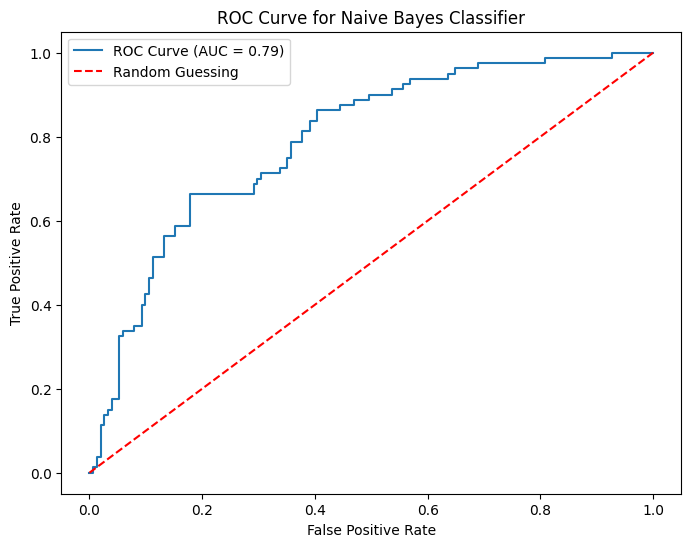

Naive Bayes Sınıflandırıcı AUC Skoru: 0.7904801324503311


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Naive Bayes sınıflandırıcısı ile olasılık tahminleri yapma
probs_nb = nb_classifier.predict_proba(X_test)[:, 1]

# ROC eğrisi ve AUC değerinin hesaplanması
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probs_nb)
auc_nb = roc_auc_score(y_test, probs_nb)

# ROC eğrisinin çizdirilmesi
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label='ROC Curve (AUC = {:.2f})'.format(auc_nb))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend()
plt.show()

# AUC skorunun yazdırılması
print("Naive Bayes Sınıflandırıcı AUC Skoru:", auc_nb)


# KNeighborsClassifier

KNN Algoritma Adımları:
* Adım 1: Optimal K değerinin seçilmesi
İlk olarak k parametresi belirlenir. K, tahmin yapılırken en yakın komşuların sayısını temsil eder. (Örnek : k=5 ise en yakın 5 komşuya göre sınıflandırma yapılacaktır.
* Adım 2: Mesafe Hesaplama
Hedef ve eğitim, veri noktaları arasındaki benzerliği (mesafeyi) ölçmek için Öklid mesafesi kullanılır. Veri kümesindeki her bir veri noktası ile hedef nokta arasındaki mesafe hesaplanır.
* Adım 3: En Yakın Komşuları Bulma
Hedef noktaya en kısa mesafeye sahip k veri noktası, en yakın komşulardır. Öznitelik değerlerine göre k komşu veya komşuların sınıfına atanır. Kaç komşu bulmak istiyorsan o kadar komşu seçilir. 4 komşu istiyorsan ilk dördüne bakılır. 7 ise ilk yedisine bakılır. Örnekte ben iki tane komşu seçtim. Hepsinde düzgün dağılımda ise 5 komşuluk için beşininde aynı sonuç çıkacaktır. 5 örnek seçtin 3 e 2 çıktı diyelim örnek veri birbirine yakın örnekler içermektedir.
* Adım 4: Sınıflandırma için Oylama veya Regresyon için Ortalama Alma
Sınıflandırma problemi için, sınıf etiketleri çoğunluk oylaması yaparak belirlenir. Komşular arasında en çok tekrar eden sınıf, hedef veri noktası için tahmin edilen sınıf haline gelir.
Regresyon problemi için, hedef noktanın K en yakın komşularının hedef değerlerinin ortalaması alınarak sınıf etiketi hesaplanır. Hesaplanan ortalama değer, hedef veri noktası için tahmin edilen çıkış haline gelir.

In [12]:
# Veri setini train ve test setlerine ayırma, veri setini %30 u test olarak ayırılmıştır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# En iyi K değerini bul
best_k = None
best_score = 0

for k in range(1, 21):  # 1'den 20'ye kadar k değerlerini dene
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    score = knn_classifier.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

# En iyi K değeri ile KNN sınıflandırıcısını oluştur ve eğit
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_knn = best_knn_classifier.predict(X_test)

# Sınıflandırma raporunu yazdır
print("En iyi K değeri:", best_k)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn))


En iyi K değeri: 17
Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.80       151
         1.0       0.64      0.47      0.55        80

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



In [14]:
from sklearn.metrics import mean_squared_error

# Modelin tahmin ettiği etiketleri kullanarak ortalama karesel hatayı hesapla
mse = mean_squared_error(y_test, y_pred_knn)
print("Ortalama Karesel Hata:", mse)

Ortalama Karesel Hata: 0.2727272727272727


In [15]:
from sklearn.neighbors import KNeighborsClassifier
# K değerlerini deneyerek en iyi performansı bul
best_k = None
best_score = 0

for k in range(1, 30):  # 1'den 30'ye kadar k değerlerini dene
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    score = knn_classifier.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

# En iyi k değerini kullanarak KNN sınıflandırıcısını oluştur ve eğit
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_knn = best_knn_classifier.predict(X_test)

# Sınıflandırma raporunu yazdır
print("En iyi K değeri:", best_k)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn))


En iyi K değeri: 23
Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81       151
         1.0       0.67      0.46      0.55        80

    accuracy                           0.74       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



In [16]:
from sklearn.metrics import mean_squared_error

# Modelin tahmin ettiği etiketleri kullanarak ortalama karesel hatayı hesapla
mse = mean_squared_error(y_test, y_pred_knn)
print("Ortalama Karesel Hata:", mse)

Ortalama Karesel Hata: 0.26406926406926406


In [17]:
from sklearn.neighbors import KNeighborsClassifier
# K değerlerini deneyerek en iyi performansı bul
best_k = None
best_score = 0

for k in range(1, 50):  # 1'den 50'ye kadar k değerlerini dene
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    score = knn_classifier.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

# En iyi k değerini kullanarak KNN sınıflandırıcısını oluştur ve eğit
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_knn = best_knn_classifier.predict(X_test)

# Sınıflandırma raporunu yazdır
print("En iyi K değeri:", best_k)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn))


En iyi K değeri: 36
Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       151
         1.0       0.71      0.49      0.58        80

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



In [18]:
from sklearn.metrics import mean_squared_error

# Modelin tahmin ettiği etiketleri kullanarak ortalama karesel hatayı hesapla
mse = mean_squared_error(y_test, y_pred_knn)
print("Ortalama Karesel Hata:", mse)

Ortalama Karesel Hata: 0.24675324675324675


In [19]:
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("K-NN Sınıflandırıcı Konfüzyon Matrisi:")
print(knn_conf_matrix)

K-NN Sınıflandırıcı Konfüzyon Matrisi:
[[135  16]
 [ 41  39]]


In [20]:
#Bu yöntem, 2x2 boyutundaki konfüzyon matrisini düzleştirir ve dört farklı hücre değerini (true negative, false positive, false negative, true positive) döndürür.
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()# Dört farklı hücre değerini ayrı değişkenlere atar.
sensitivity = tp / (tp + fn)# Hassasiyet, gerçek pozitiflerin (TP) tüm pozitif tahminlere (TP + FN) oranını ifade eder.
specificity = tn / (tn + fp)# Özgünlük, gerçek negatiflerin (TN) tüm negatif tahminlere (TN + FP) oranını ifade eder.

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)

Sensitivity (Duyarlılık): 0.4875
Specificity (Özgünlük): 0.8940397350993378


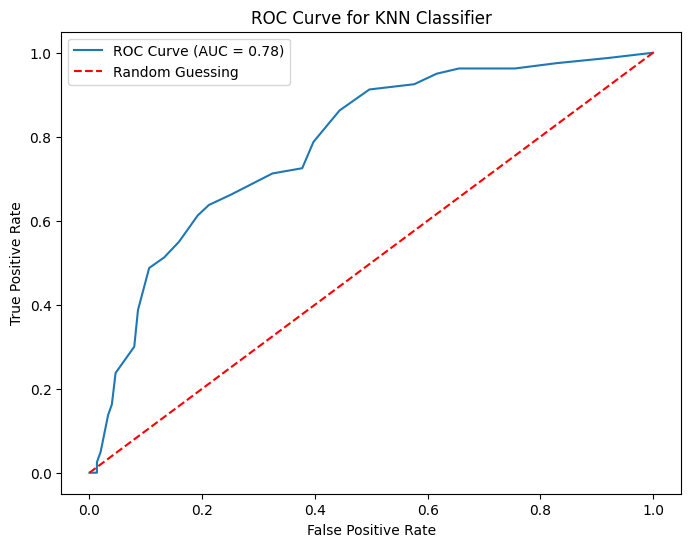

KNN Sınıflandırıcı AUC Skoru: 0.7813327814569536


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test seti üzerinde olasılık tahminleri yap
probs_knn = best_knn_classifier.predict_proba(X_test)[:, 1]

# ROC eğrisi ve AUC değerinin hesaplanması
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)
auc_knn = roc_auc_score(y_test, probs_knn)

# ROC eğrisinin çizdirilmesi
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='ROC Curve (AUC = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend()
plt.show()

# AUC skorunun yazdırılması
print("KNN Sınıflandırıcı AUC Skoru:", auc_knn)


KMeans için 1'den 50'ye kadar k değerleri en optimum değer oluşmuştur.

# MLPClassifier

MLPClassifier (Çok Katmanlı Algılayıcı) çok katmanlı yapay sinir ağları (YSA) kullanarak sınıflandırma problemlerini çözmek için kullanılan bir sınıflandırma algoritmasıdır. Temel olarak, YSA, insan beyninin sinir ağlarını modelleyen bir yapay sinir ağı türüdür.

MLPClassifier'ın çalışma prensibi şu adımları içerir:

* Giriş Katmanı (Input Layer):

Giriş katmanı, modele verilen özelliklerin sayısına göre oluşturulur. Her bir özellik, bir giriş nöronuna bağlanır.

* Gizli Katmanlar (Hidden Layers):

Çok katmanlı algılayıcı, bir veya daha fazla gizli katmana sahip olabilir. Bu katmanlar, giriş özelliklerini daha karmaşık ilişkileri öğrenmek için kullanır. Her gizli katman, önceki katmandan gelen çıktıları alır ve bu çıktıları bir sonraki katmana iletir. Her bir gizli katmanda birçok gizli nöron bulunabilir.

* Çıkış Katmanı (Output Layer):

Çıkış katmanı, modelin sınıflandırma yapmasını sağlar. Sınıflandırma probleminin türüne bağlı olarak, çıkış katmanındaki nöron sayısı sınıf sayısına eşit olabilir. Çıkış katmanındaki her bir nöron, belirli bir sınıfı temsil eder.
Aktivasyon Fonksiyonları:

Her gizli katmanda ve çıkış katmanında bulunan nöronlar, aktivasyon fonksiyonları olarak adlandırılan işlevleri kullanarak gelen sinyalleri işler. Bu fonksiyonlar, sinir ağının esnekliğini artırarak modelin daha karmaşık ilişkileri öğrenmesine yardımcı olur.

* Eğitim (Training):

MLPClassifier, verileri kullanarak modeli eğitir. Eğitim sürecinde, model giriş özelliklerini kullanarak tahminler yapar, bu tahminlerin gerçek etiketlerle karşılaştırır ve ardından bir kayıp fonksiyonu kullanarak modelin performansını değerlendirir. Geriye yayılım (backpropagation) algoritması kullanılarak, modelin tahminlerini iyileştirmek için ağırlıkların güncellenmesi sağlanır.
* Yapılandırma Parametreleri:

MLPClassifier'da birçok yapılandırma parametresi bulunur. Bunlar arasında gizli katman sayısı, gizli katmanlardaki nöron sayısı, aktivasyon fonksiyonları, öğrenme oranı gibi parametreler yer alır. Bu parametreler, modelin performansını ve genelleme yeteneğini etkiler.

In [22]:
# Veri setini train ve test setlerine ayırma, veri setini %30 u test olarak ayırılmıştır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.neural_network import MLPClassifier  # MLP sınıflandırıcısını içe aktarır
from sklearn.metrics import classification_report  # Sınıflandırma raporu oluşturmak için gerekli kütüphaneyi içe aktarır

# MLP Sınıflandırıcıyı oluşturur ve eğitir.bir çok katmanlı algılayıcı (MLP) sınıflandırıcısını oluşturur.
# hidden_layer_sizes=(100, 50) parametresi, gizli katmanların sayısını ve her bir gizli katmandaki nöron sayısını belirtir. max_iter=1000,
# eğitimin maksimum iterasyon sayısını belirtir. random_state=42, sonuçların tekrarlanabilir olmasını sağlayan rastgele bir tohum değeridir.
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapar
y_pred_mlp = mlp_classifier.predict(X_test)

# Sınıflandırma doğruluğunu hesaplar
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)

# Modelin doğruluğunu yazdırır
print("MLP Sınıflandırıcı Doğruluk:", mlp_accuracy)

# Sınıflandırma raporunu yazdırır
print("MLP Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_mlp))


MLP Sınıflandırıcı Doğruluk: 0.7012987012987013
MLP Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       151
         1.0       0.57      0.59      0.58        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



In [24]:
from sklearn.metrics import mean_squared_error

# Modelin tahmin ettiği etiketleri kullanarak ortalama karesel hatayı hesapla
mse = mean_squared_error(y_test, y_pred_mlp)
print("Ortalama Karesel Hata:", mse)

Ortalama Karesel Hata: 0.2987012987012987


In [25]:
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)

print("MLP Sınıflandırıcı Konfüzyon Matrisi:")
print(mlp_conf_matrix)


MLP Sınıflandırıcı Konfüzyon Matrisi:
[[115  36]
 [ 33  47]]


In [26]:
#Bu yöntem, 2x2 boyutundaki konfüzyon matrisini düzleştirir ve dört farklı hücre değerini (true negative, false positive, false negative, true positive) döndürür.
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mlp).ravel()# Dört farklı hücre değerini ayrı değişkenlere atar.
sensitivity = tp / (tp + fn)# Hassasiyet, gerçek pozitiflerin (TP) tüm pozitif tahminlere (TP + FN) oranını ifade eder.
specificity = tn / (tn + fp)# Özgünlük, gerçek negatiflerin (TN) tüm negatif tahminlere (TN + FP) oranını ifade eder.

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)

Sensitivity (Duyarlılık): 0.5875
Specificity (Özgünlük): 0.7615894039735099


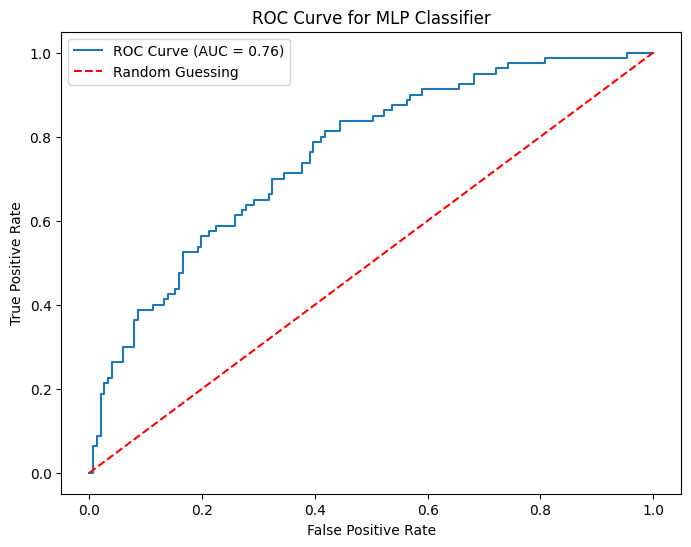

MLP Sınıflandırıcı AUC Skoru: 0.7569536423841059


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# MLP sınıflandırıcısı ile olasılık tahminleri yapma
probs_mlp = mlp_classifier.predict_proba(X_test)[:, 1]

# ROC eğrisi ve AUC değerinin hesaplanması
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, probs_mlp)
auc_mlp = roc_auc_score(y_test, probs_mlp)

# ROC eğrisinin çizdirilmesi
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label='ROC Curve (AUC = {:.2f})'.format(auc_mlp))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Classifier')
plt.legend()
plt.show()

# AUC skorunun yazdırılması
print("MLP Sınıflandırıcı AUC Skoru:", auc_mlp)


# SVC

Support Vector Machine (Destek Vektör Makinesi), genellikle sınıflandırma ve regresyon problemlerinde kullanılan bir makine öğrenimi algoritmasıdır. SVC, SVM'nin sınıflandırma problemlerine uygulanmış halidir.

SVC, sınıflandırma problemlerini çözmek için SVM algoritmasını kullanır. SVM'nin temel amacı, veri noktalarını iki veya daha fazla sınıf arasında ayıran bir hiper düzlemi belirlemektir. Bu hiper düzlem, veri noktalarını en iyi şekilde ayırmak için maksimum marjı (uzaklığı) sağlamak üzere seçilir. SVC, bu amaca yönelik olarak SVM'nin sınıflandırma için uygulanmış halidir ve sınıflandırma problemlerini çözmek için kullanılır.

In [28]:
# Veri setini train ve test setlerine ayırma, veri setini %30 u test olarak ayırılmıştır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.svm import SVC  # SVM sınıflandırıcısını içe aktarır
from sklearn.metrics import classification_report  # Sınıflandırma raporu oluşturmak için gerekli kütüphaneyi içe aktarır

# SVM Sınıflandırıcıyı oluşturur ve eğitir.bir destek vektör makinesi (SVM) sınıflandırıcısı oluşturur.
# kernel='rbf' parametresi,  doğrusal olmayan veri yapılarını modellemek için kullanılır.
# C=1, modelin düzenleme parametresidir. random_state=42, sonuçların tekrarlanabilir olmasını sağlayan rastgele bir tohum değeridir.
svm_classifier = SVC(kernel='rbf', C=1, random_state=42)

svm_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapar
y_pred_svm = svm_classifier.predict(X_test)

# Sınıflandırma doğruluğunu hesaplar
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Modelin doğruluğunu yazdırır
print("SVM Sınıflandırıcı Doğruluk:", svm_accuracy)

# Sınıflandırma raporunu yazdırır
print("SVM Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_svm))



SVM Sınıflandırıcı Doğruluk: 0.7532467532467533
SVM Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       151
         1.0       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [30]:
from sklearn.model_selection import cross_val_score

# SVC sınıflandırıcısı için çapraz doğrulama yap
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Çapraz doğrulama sonuçlarını yazdır
print("Çapraz Doğrulama Sonuçları:", cross_val_scores)
print("Ortalama Doğruluk:", cross_val_scores.mean())


Çapraz Doğrulama Sonuçları: [0.81481481 0.77777778 0.74766355 0.74766355 0.74766355]
Ortalama Doğruluk: 0.7671166493596401


In [31]:
from sklearn.svm import SVC  # SVM sınıflandırıcısını içe aktarır
from sklearn.metrics import classification_report  # Sınıflandırma raporu oluşturmak için gerekli kütüphaneyi içe aktarır

# SVM Sınıflandırıcıyı oluşturur ve eğitir.bir destek vektör makinesi (SVM) sınıflandırıcısı oluşturur.
# kernel='linear' parametresi, doğrusal bir kernel kullanılacağını belirtir.
# C=1, modelin düzenleme parametresidir. random_state=42, sonuçların tekrarlanabilir olmasını sağlayan rastgele bir tohum değeridir.
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapar
y_pred_svm = svm_classifier.predict(X_test)

# Sınıflandırma doğruluğunu hesaplar
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Modelin doğruluğunu yazdırır
print("SVM Sınıflandırıcı Doğruluk:", svm_accuracy)

# Sınıflandırma raporunu yazdırır
print("SVM Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_svm))



SVM Sınıflandırıcı Doğruluk: 0.7532467532467533
SVM Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       151
         1.0       0.66      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [32]:
from sklearn.model_selection import cross_val_score

# SVC sınıflandırıcısı için çapraz doğrulama yap
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Çapraz doğrulama sonuçlarını yazdır
print("Çapraz Doğrulama Sonuçları:", cross_val_scores)
print("Ortalama Doğruluk:", cross_val_scores.mean())


Çapraz Doğrulama Sonuçları: [0.81481481 0.76851852 0.80373832 0.72897196 0.76635514]
Ortalama Doğruluk: 0.7764797507788161


In [33]:
from sklearn.metrics import mean_squared_error

# Modelin tahmin ettiği etiketleri kullanarak ortalama karesel hatayı hesapla
mse = mean_squared_error(y_test, y_pred_svm)
print("Ortalama Karesel Hata:", mse)

Ortalama Karesel Hata: 0.24675324675324675


In [34]:
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("SVM Sınıflandırıcı Konfüzyon Matrisi:")
print(svm_conf_matrix)

SVM Sınıflandırıcı Konfüzyon Matrisi:
[[127  24]
 [ 33  47]]


In [35]:
#Bu yöntem, 2x2 boyutundaki konfüzyon matrisini düzleştirir ve dört farklı hücre değerini (true negative, false positive, false negative, true positive) döndürür.
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()# Dört farklı hücre değerini ayrı değişkenlere atar.
sensitivity = tp / (tp + fn)# Hassasiyet, gerçek pozitiflerin (TP) tüm pozitif tahminlere (TP + FN) oranını ifade eder.
specificity = tn / (tn + fp) # Özgünlük, gerçek negatiflerin (TN) tüm negatif tahminlere (TN + FP) oranını ifade eder.

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)

Sensitivity (Duyarlılık): 0.5875
Specificity (Özgünlük): 0.8410596026490066


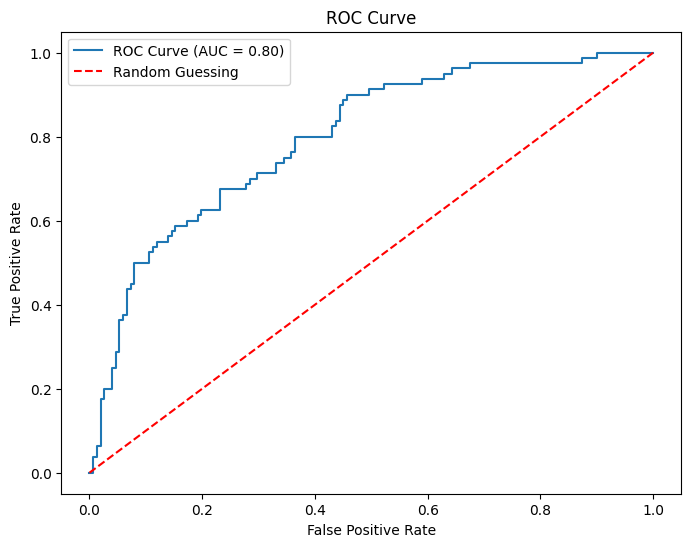

AUC Score: 0.7971026490066225


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Önceden eğitilmiş SVM sınıflandırıcısı kullanılarak karar fonksiyonu değerleri elde ediliyor.
decision_values = svm_classifier.decision_function(X_test)

# Karar fonksiyonu değerlerinden tahmin edilen olasılıklar hesaplanıyor.
# Burada, olasılık tahminleri normalize edilmiyor, bu nedenle bir ölçekte değiller.
probs_svm = decision_values

# ROC eğrisi ve AUC değerinin hesaplanması
fpr, tpr, thresholds = roc_curve(y_test, probs_svm)
auc = roc_auc_score(y_test, probs_svm)

# ROC eğrisinin çizdirilmesi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC skorunun yazdırılması
print("AUC Score:", auc)
